<a href="https://colab.research.google.com/github/khushbuchuahan3/Opencv/blob/main/Plant_Seeding_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import cv2
import math
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt


In [28]:
path = '/content/drive/MyDrive/Nonsegmented/*/*.png'  #File path

files = glob(path)

trainImg = []
trainLabel = []
j = 1
num = len(files)

for img in files:
    trainImg.append(cv2.resize(cv2.imread(img), (100, 100)))  # Get image (with resizing)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)


In [29]:
trainImg[0].shape #Shape of images

(100, 100, 3)

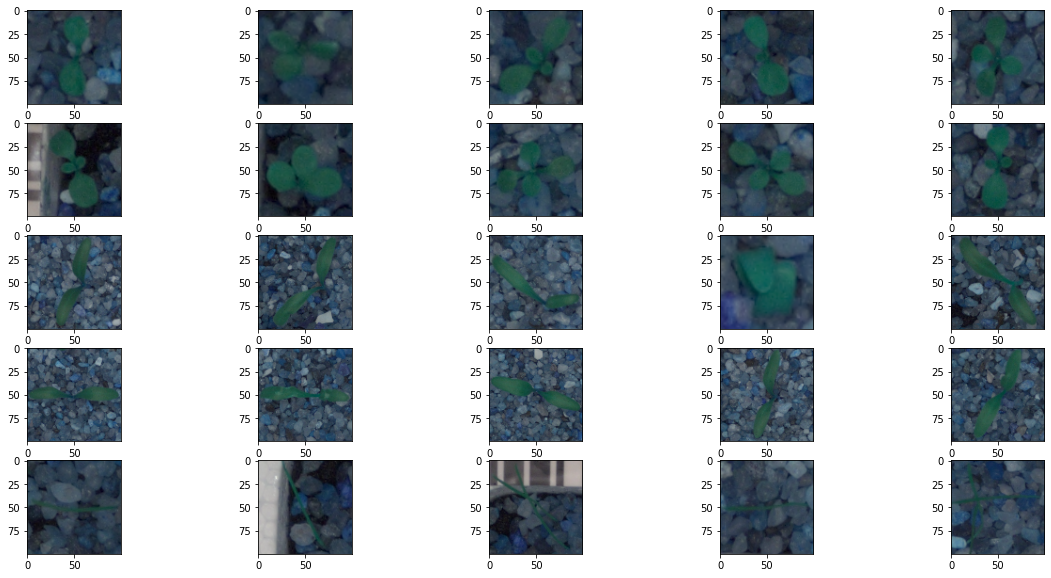

In [30]:
plt.figure(figsize=(20,10))  
for i in range(25):  #Plot diffrent images of plant in  plot
    plt.subplot(5, 5, i + 1)
    plt.imshow(trainImg[i])


In [31]:
trainLabel.value_counts()  #Image contain in diffrent Segment

Small-flowered Cranesbill    11
Charlock                     10
Cleavers                     10
Common Chickweed             10
Common wheat                 10
Fat Hen                      10
Loose Silky-bent             10
Maize                        10
Scentless Mayweed            10
Shepherd’s Purse             10
Sugar beet                   10
Black-grass                   9
dtype: int64

In [32]:
clearimgs=[] #Create empty List

for img in trainImg:
  imgblur=cv2.GaussianBlur(img,(5,5),0)  #  Use gaussian blur
  imghsv=cv2.cvtColor(imgblur,cv2.COLOR_BGR2HSV) #Converting in to HSV
  lowergreen=(30,40,50)   #Creating Mask
  uppergreen=(200,255,255)
  
  mask=cv2.inRange(imghsv,lowergreen,uppergreen)
  median=cv2.medianBlur(img,5) #Apply Median Blur
  imgshapen=cv2.addWeighted(img,1.5,median,-0.5,0)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bmask=mask>0    #Create boolean mask

  blank=np.zeros_like(img,np.uint8) #Create Empty Image
  blank[bmask]=img[bmask]  #Apply Boolean Mask to origional Image
  clearimgs.append(blank)  #Append images

clearimgs=np.asarray(clearimgs) #Adding in empty list

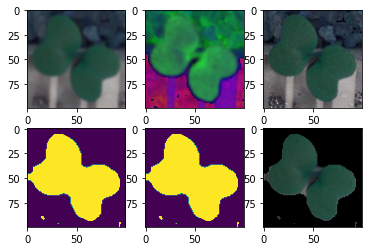

In [33]:
plt.subplot(2,3,1)
plt.imshow(imgblur) #Plot blurImage
plt.subplot(2,3,2)
plt.imshow(imghsv) #Plot HSVImage
plt.subplot(2,3,3)
plt.imshow(imgshapen) #Sharp the Image
plt.subplot(2,3,4)
plt.imshow(mask)  #Mask Image
plt.subplot(2,3,5)
plt.imshow(bmask)  #Boolean Mask
plt.subplot(2,3,6)
plt.imshow(blank) #Clear Image

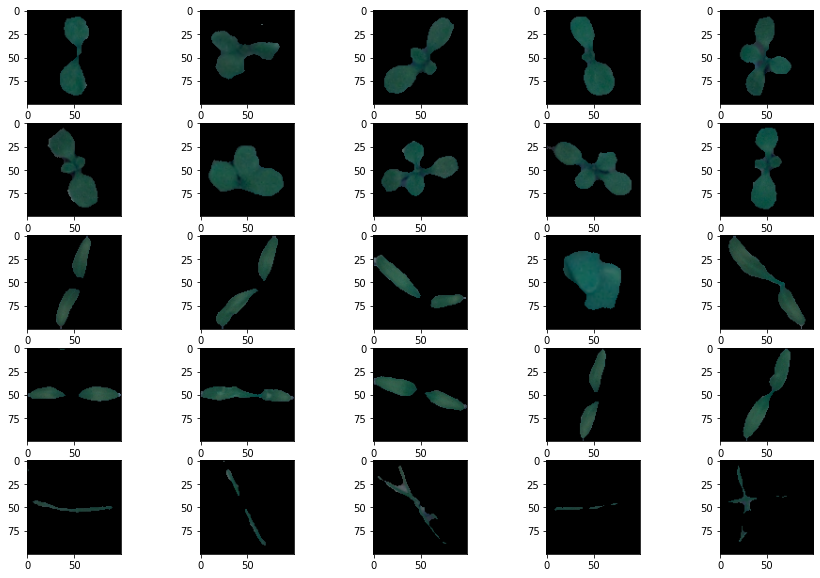

In [34]:
plt.figure(figsize=(15,10))
for i in range(25):
    plt.subplot(5,5, i + 1)
    plt.imshow(clearimgs[i])
